In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import linalg as LA

In [2]:
from tqdm import tqdm

In [3]:
import MDAnalysis as mda 

In [4]:
pdb_file = '../../../../covid19/Nsp10_Nsp16/md_runs/run_comp/no_sol.pdb' 
dcd_file = '../../../../covid19/Nsp10_Nsp16/md_runs/run_comp/no_sol.dcd' 

In [5]:
mda_u = mda.Universe(pdb_file, dcd_file)

In [6]:
nsp16 = mda_u.segments[0].atoms
nsp10 = mda_u.segments[1].atoms
no_sol = mda_u.select_atoms("protein")
dist_list = []
for ts in tqdm(mda_u.trajectory[:100]):
    box_edge = ts.dimensions[0]
    box_center = box_edge / 2
    trans_vec = box_center - np.array(nsp16.center_of_mass())
    no_sol.atoms.translate(trans_vec).wrap()
    trans_vec = box_center - np.array(no_sol.center_of_mass())
    no_sol.atoms.translate(trans_vec).wrap()
    dist_vec = nsp10.center_of_mass() - nsp16.center_of_mass()
    dist = LA.norm(dist_vec)

    dist_list += [dist]

100%|██████████| 100/100 [00:00<00:00, 447.53it/s]


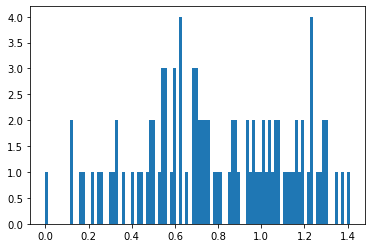

In [7]:
_ = plt.hist(dist_list - min(dist_list), bins=100)

In [8]:
dist_0 = dist_list[0]
dist_0

31.85006427236185

81506 29.110659715792877 59.62666586439712
60190 18.010266211732034 69.05795279367808


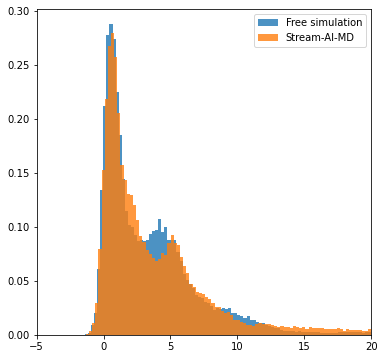

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
dist = np.load("../../../nsp10_16/dist_skip14.npy")
print(len(dist), min(dist), max(dist))
dist = dist - dist_0
dist = dist[dist > -5]
dist = dist[dist < 20]
_ = plt.hist(dist, bins=100, density=True, alpha=.8, label='Free simulation')

dist = np.load("../../../nsp10_16/dist_deep_skip14.npy")
print(len(dist), min(dist), max(dist))
dist = dist - dist_0
dist = dist[dist > -5]
dist = dist[dist < 20]
_ = plt.hist(dist, bins=100, density=True, alpha=.8, label='Stream-AI-MD')
plt.xlim([-5, 20])
plt.legend()

69550 18.010266211732034 69.05795279367808


(-5.0, 20.0)

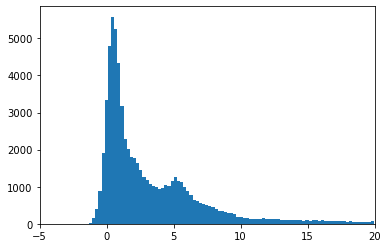

In [12]:
dist = np.load("../../../nsp10_16/dist_deep.npy")
print(len(dist), min(dist), max(dist))
dist = dist - dist_0
dist = dist[dist > -5]
dist = dist[dist < 20]
_ = plt.hist(dist, bins=100)
plt.xlim([-5, 20])

In [ ]:
_ = plt.hist(dist - min(dist), bins=100)

In [ ]:
import MDAnalysis as mda 

In [ ]:
pdb_file = '../../../../covid19/Nsp10_Nsp16/md_runs/run_comp/no_sol.pdb' 
dcd_file = '../../../../covid19/Nsp10_Nsp16/md_runs/run_comp/no_sol.dcd' 

In [ ]:
mda_u = mda.Universe(pdb_file, dcd_file)

In [ ]:
nsp16 = mda_u.segments[0].atoms
nsp10 = mda_u.segments[1].atoms
no_sol = mda_u.select_atoms("protein")
dist_list = []
for ts in tqdm(mda_u.trajectory):
    box_edge = ts.dimensions[0]
    box_center = box_edge / 2
    trans_vec = box_center - np.array(nsp16.center_of_mass())
    no_sol.atoms.translate(trans_vec).wrap()
    trans_vec = box_center - np.array(no_sol.center_of_mass())
    no_sol.atoms.translate(trans_vec).wrap()
    dist_vec = nsp10.center_of_mass() - nsp16.center_of_mass()
    dist = LA.norm(dist_vec)

    dist_list += [dist]

In [ ]:
_ = plt.hist(dist_list - min(dist_list),b bins=100)

In [ ]:
dist_list[0]